# Data

It is a data set with the following variables stored in SM_data.csv

- Height (H)
- Palm Length (PL)
- Arm length (AL)
- Foot Length (FL)
- Male/Female (MF)

In [11]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


How to read a .csv file ?

In [12]:
import pandas as pd

# Reading the CSV file (use the correct path after uploading the file)
data = pd.read_csv("/content/drive/MyDrive/SM_data.csv")

# Displaying the first few rows of the dataset
print(data.head())


         H     PL     AL    FL MF
0  161.544  10.43  16.36  21.6  F
1  176.000  20.00  26.00  27.0  M
2  180.000  20.00  30.00  22.0  M
3  176.000  12.00  28.00  15.0  M
4  181.000  20.00  25.00  28.0  M


# Data Summary

Find the following measures of the variable Height
- Mean
- Median
- Variance
- Range

In [13]:
import numpy as np

# Assuming the data is already loaded
# Replace 'H' with the actual column name for height in your dataset
height = data['H']

# Calculating statistics
mean_height = height.mean()
median_height = height.median()
variance_height = height.var()
range_height = (height.min(), height.max())

# Displaying the results
print(f"Mean of the height = {mean_height}")
print(f"Median of the height = {median_height}")
print(f"Variance of the height = {variance_height}")
print(f"Range of the height = {range_height}")


Mean of the height = 166.71383783783784
Median of the height = 167.57
Variance of the height = 124.38555843909664
Range of the height = (132.0, 183.0)


# Normal distribution fitting

- Fit normal distribution to the variable Palm Length (PL)

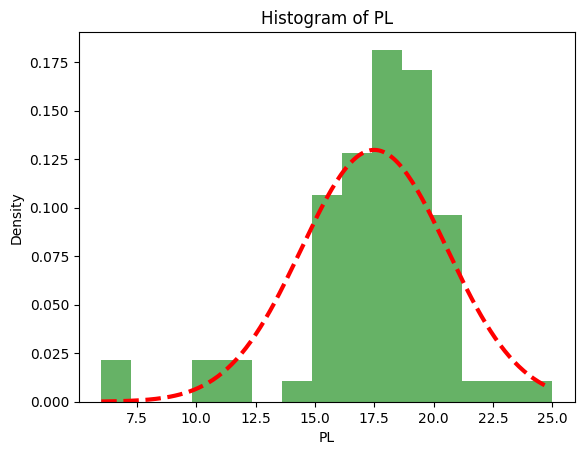

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate mean, standard deviation, min, and max of the 'PL' column
m = data['PL'].mean()
s = data['PL'].std()
l = data['PL'].min()
u = data['PL'].max()

# Generate a sequence from min to max with step size 0.1
sq = np.arange(l, u, 0.1)

# Plot the histogram of the 'PL' column
plt.hist(data['PL'], bins=15, density=True, alpha=0.6, color='g')

# Plot the normal distribution line
plt.plot(sq, norm.pdf(sq, m, s), color='r', linestyle='--', linewidth=3)

plt.xlabel('PL')  # X-axis label
plt.ylabel('Density')  # Y-axis label
plt.title('Histogram of PL')  # Graph title

# Show the plot
plt.show()


# Point and Interval Estimation

- Find the MLE of the mean of palm length.
- Find an unbiased estimate of the variance of palm length.
- Find an MLE the variance of palm length.
- Find the 95% CI of the mean of palm length.
- Find the 95% CI of the variance of palm length.

In [15]:
from scipy import stats

# MLE of the mean of palm length
mean_PL = data['PL'].mean()
print(f"MLE of the mean of palm length = {mean_PL:.5f} cm.\n")

# Unbiased estimate of the variance of palm length
var_PL = data['PL'].var(ddof=1)  # Pandas uses ddof=1 for unbiased variance
print(f"Unbiased estimate of the Var of palm length = {var_PL:.5f} cm.^2.\n")

# MLE of the variance of palm length
n = len(data['PL'])
MLE_VAR = var_PL * (1 - 1/n)
print(f"MLE of the var of palm length = {MLE_VAR:.5f} cm.\n")

# 95% Confidence Interval for the mean using a t-test
meant = stats.t.interval(0.95, df=n-1, loc=mean_PL, scale=stats.sem(data['PL']))
print(f"95% CI of the mean of palm length is ({meant[0]:.5f}, {meant[1]:.5f})\n")

# 95% Confidence Interval for the variance using chi-square distribution
alpha = 0.05
chi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
chi2_upper = stats.chi2.ppf(1-alpha/2, df=n-1)

lower_var = (n-1) * var_PL / chi2_upper
upper_var = (n-1) * var_PL / chi2_lower
print(f"95% CI of the variance of palm length is ({lower_var:.5f}, {upper_var:.5f})\n")


MLE of the mean of palm length = 17.49865 cm.

Unbiased estimate of the Var of palm length = 9.45449 cm.^2.

MLE of the var of palm length = 9.32673 cm.

95% CI of the mean of palm length is (16.78627, 18.21103)

95% CI of the variance of palm length is (7.00572, 13.46299)



# Covariance matrix

- Obtain the covariance matrix for Height (H), Palm Length (PL), Arm length (AL) and Foot Length (FL)
- Obtain Eigenvalues of the covariance Matrix.
- Obtain the proportion of variation explained by the Eigen-directions of the covariance Matrix.
- Obtain the correlation Matrix

In [16]:
# Calculate the covariance matrix for the first 4 columns
cov_mat = data.iloc[:, 0:4].cov()

# Print the covariance matrix
print(cov_mat)


             H         PL          AL         FL
H   124.385558  16.754045    3.163261  14.759672
PL   16.754045   9.454489    8.545131   9.744364
AL    3.163261   8.545131  197.277310   9.885190
FL   14.759672   9.744364    9.885190  13.042710


In [17]:
# Calculate the covariance matrix for the first 4 columns
cov_mat = data.iloc[:, 0:4].cov()

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

# Print the eigenvalues
print(eigenvalues)

[198.56145661 128.52459064  15.85488253   1.21913765]


In [18]:
# Calculate the cumulative sum of the eigenvalues divided by the total sum of the eigenvalues
cumulative_sum = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Print the result
print(cumulative_sum)

[0.57694508 0.9503893  0.99645764 1.        ]


In [19]:
# Calculate the correlation matrix for the first 4 columns
correlation_matrix = data.iloc[:, 0:4].corr()

# Print the correlation matrix
print(correlation_matrix)

           H        PL        AL        FL
H   1.000000  0.488557  0.020193  0.366444
PL  0.488557  1.000000  0.197861  0.877507
AL  0.020193  0.197861  1.000000  0.194878
FL  0.366444  0.877507  0.194878  1.000000


# Regression : Least square

- Fit a list square regression line for Height Vs Palm length?
- Are these lines same for the male and female?

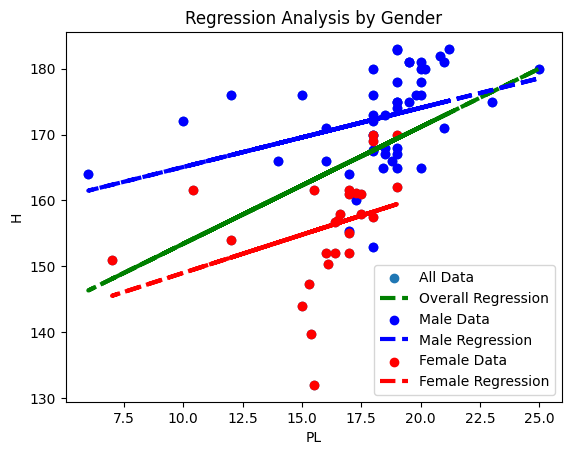

Female Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      H   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.218
Date:                Mon, 14 Oct 2024   Prob (F-statistic):             0.0855
Time:                        14:43:02   Log-Likelihood:                -91.369
No. Observations:                  26   AIC:                             186.7
Df Residuals:                      24   BIC:                             189.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.4182    

<ipython-input-20-e652bd0a8da8>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"(Intercept): {model3.params[0]:.4f}, PL: {model3.params[1]:.4f}\n")
<ipython-input-20-e652bd0a8da8>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"(Intercept): {model2.params[0]:.4f}, PL: {model2.params[1]:.4f}\n")
<ipython-input-20-e652bd0a8da8>:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"(Intercept): {model1.params[0]

In [20]:

import statsmodels.api as sm

# Overall regression
X = sm.add_constant(data['PL'])  # Adding a constant for intercept
model1 = sm.OLS(data['H'], X).fit()

# Plot overall data
plt.scatter(data['PL'], data['H'], label='All Data')
plt.plot(data['PL'], model1.predict(X), color='green', linewidth=3, linestyle='--', label='Overall Regression')

# Filter for males
male_data = data[data['MF'] == "M"]
X_male = sm.add_constant(male_data['PL'])
model2 = sm.OLS(male_data['H'], X_male).fit()


# Plot male data
plt.scatter(male_data['PL'], male_data['H'], color='blue', label='Male Data')
plt.plot(male_data['PL'], model2.predict(X_male), color='blue', linewidth=3, linestyle='--', label='Male Regression')

# Filter for females
female_data = data[data['MF'] != "M"]
X_female = sm.add_constant(female_data['PL'])
model3 = sm.OLS(female_data['H'], X_female).fit()

# Plot female data
plt.scatter(female_data['PL'], female_data['H'], color='red', label='Female Data')
plt.plot(female_data['PL'], model3.predict(X_female), color='red', linewidth=3, linestyle='--', label='Female Regression')

# Add labels and legend
plt.xlabel('PL')
plt.ylabel('H')
plt.legend()
plt.title('Regression Analysis by Gender')
plt.show()

# Print female regression summary
print("Female Regression Summary:")
print(model3.summary())
print("\nCoefficients:")
print(f"(Intercept): {model3.params[0]:.4f}, PL: {model3.params[1]:.4f}\n")

# Print male regression summary
print("Male Regression Summary:")
print(model2.summary())
print("\nCoefficients:")
print(f"(Intercept): {model2.params[0]:.4f}, PL: {model2.params[1]:.4f}\n")

# Print overall regression summary
print("Overall Regression Summary:")
print(model1.summary())
print("\nCoefficients:")
print(f"(Intercept): {model1.params[0]:.4f}, PL: {model1.params[1]:.4f}\n")

